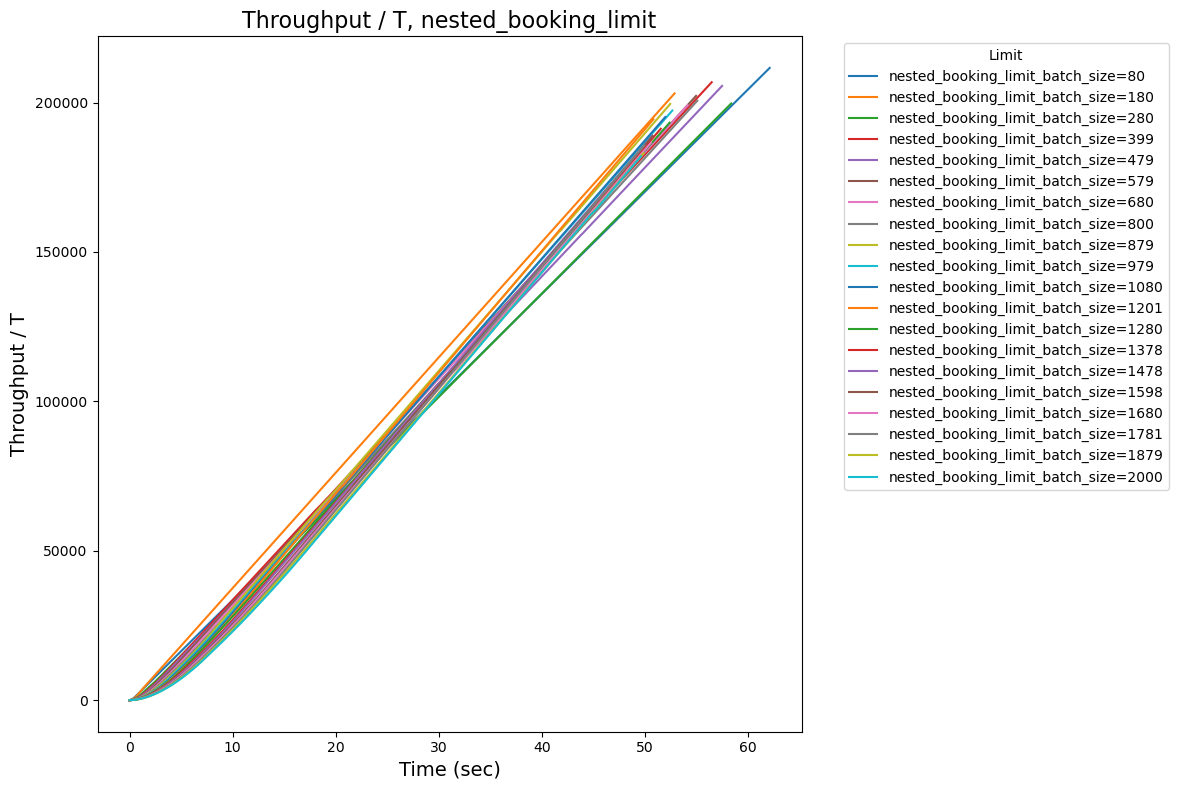

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# 指定vllm文件夹的路径
vllm_folder = './nested'

# 获取vllm文件夹下所有符合条件的CSV文件
csv_files = [f for f in os.listdir(vllm_folder) if f.startswith('throughput_general_nested_booking_limit_limit_') and f.endswith('.csv')]

# 按照batch_size从小到大排序
csv_files.sort(key=lambda x: int(x.split('_')[-1].split('.')[0]))

# 创建一个新的图表
plt.figure(figsize=(12, 8))

# 遍历每个CSV文件
for file in csv_files:
    # 从文件名中提取batch_size
    batch_size = file.split('_')[-1].split('.')[0]
    
    # 使用pandas读取CSV文件
    file_path = os.path.join(vllm_folder, file)
    df = pd.read_csv(file_path)
    
    # 绘制throughput_per_T随时间变化的曲线
    plt.plot(df['Time (sec)'], df['throughput'], label=f'nested_booking_limit_batch_size={batch_size}')

# 添加图例
plt.legend(title='Limit', bbox_to_anchor=(1.05, 1), loc='upper left')

# 添加标题和标签
plt.title('Throughput / T, nested_booking_limit', fontsize=16)
plt.xlabel('Time (sec)', fontsize=14)
plt.ylabel('Throughput / T', fontsize=14)

# 调整布局，防止图例遮挡
plt.tight_layout()

# 显示图表
plt.show()

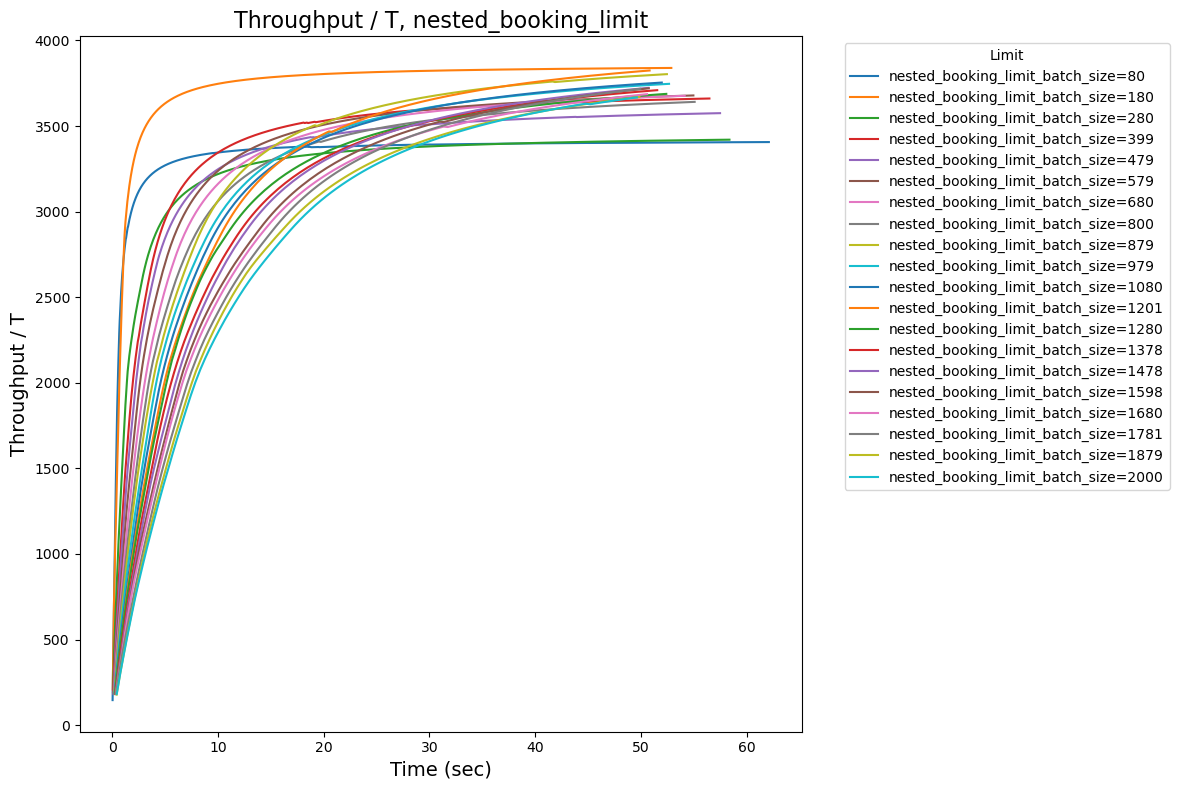

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# 指定vllm文件夹的路径
vllm_folder = './nested'

# 获取vllm文件夹下所有符合条件的CSV文件
csv_files = [f for f in os.listdir(vllm_folder) if f.startswith('throughput_general_nested_booking_limit_limit_') and f.endswith('.csv')]

# 按照batch_size从小到大排序
csv_files.sort(key=lambda x: int(x.split('_')[-1].split('.')[0]))

# 创建一个新的图表
plt.figure(figsize=(12, 8))

# 遍历每个CSV文件
for file in csv_files:
    # 从文件名中提取batch_size
    batch_size = file.split('_')[-1].split('.')[0]
    
    # 使用pandas读取CSV文件
    file_path = os.path.join(vllm_folder, file)
    df = pd.read_csv(file_path)
    
    # 计算 T时刻的throughput / T
    df['throughput_per_T'] = df['throughput'] / df['Time (sec)']
    
    # 绘制throughput_per_T随时间变化的曲线
    plt.plot(df['Time (sec)'], df['throughput_per_T'], label=f'nested_booking_limit_batch_size={batch_size}')

# 添加图例
plt.legend(title='Limit', bbox_to_anchor=(1.05, 1), loc='upper left')

# 添加标题和标签
plt.title('Throughput / T, nested_booking_limit', fontsize=16)
plt.xlabel('Time (sec)', fontsize=14)
plt.ylabel('Throughput / T', fontsize=14)

# 调整布局，防止图例遮挡
plt.tight_layout()

# 显示图表
plt.show()

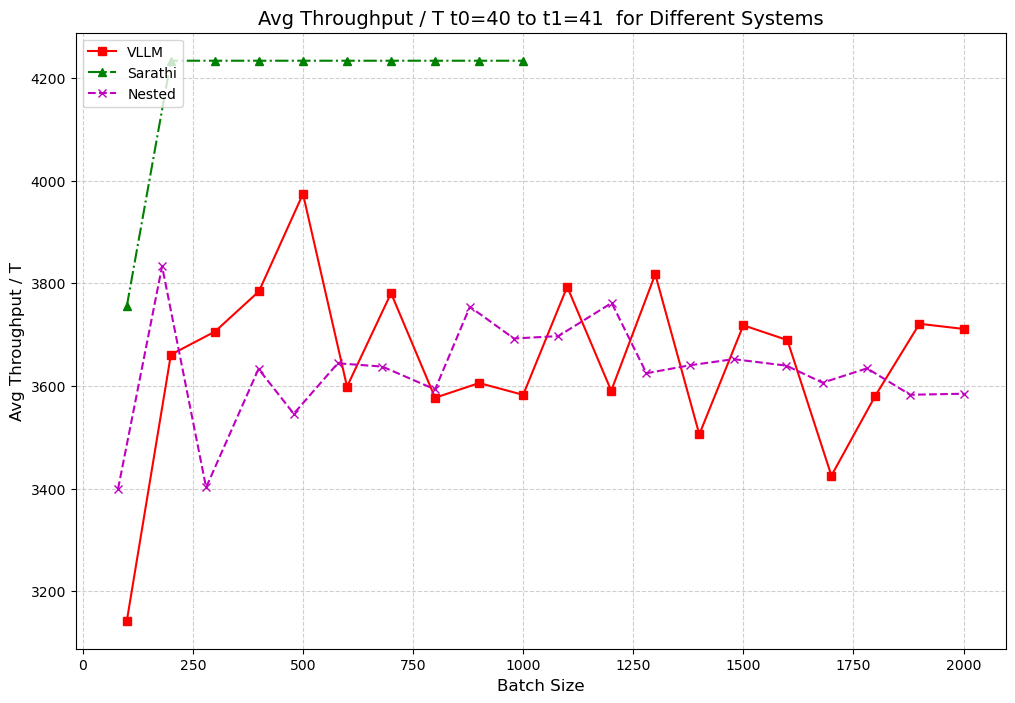

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# 指定文件夹的路径
folder_info = [
    # {
    #     'name': 'Modified',
    #     'path': './modified_booking_limit',
    #     'pattern': 'throughput_modified_booking_limit_limit_*.csv',
    #     'key': 'Limit'
    # },
    {
        'name': 'VLLM',
        'path': './vllm',
        'pattern': 'throughput_vllm_batch_size_*.csv',
        'key': 'batch_size'
    },
    {
        'name': 'Sarathi',
        'path': './sarathi',
        'pattern': 'throughput_sarathi_batch_size_*.csv',
        'key': 'batch_size'
    },
    {
        'name': 'Nested',
        'path': './nested',
        'pattern': 'throughput_general_nested_booking_limit_limit_*.csv',
        'key': 'Limit'
    },
    # {
    #     'name': 'Modified_Nested',
    #     'path': './modified_nested',
    #     'pattern': 'throughput_general_nested_booking_limit_limit_*.csv',
    #     'key': 'Limit'
    # },

]

# 设置 t0 的值
t0 = 40  # 你可以修改为合适的时间点
t1 = 41

# 存储所有数据
all_data = {
    'batch_sizes': {},  # 用于存储 batch_size 和对应的 throughput_per_T 平均值
    'mean_throughputs': {},
    'labels': []
}

# 定义函数用于提取 batch_size
def extract_batch_size(file_name, pattern, key):
    try:
        if pattern.startswith('throughput_modified_booking_limit_limit_'):
            # Split the file name and extract the last part before .csv
            parts = file_name.split('_')
            batch_size = int(parts[-1].split('.')[0])
            return batch_size
        elif pattern.startswith('throughput_general_nested_booking_limit_limit_'):
            # Split the file name and extract the last part before .csv
            parts = file_name.split('_')
            batch_size = int(parts[-1].split('.')[0])
            return batch_size
        elif 'batch_size' in pattern:
            # Split the file name using '_batch_size_'
            parts = file_name.split('_batch_size_')
            if len(parts) >= 2:
                batch_part = parts[-1].split('.')[0]
                return int(batch_part)
        return None
    except ValueError:
        return None

# 遍历每个文件夹
for info in folder_info:
    folder_name = info['name']
    folder_path = info['path']
    pattern = info['pattern']
    
    # 获取符合条件的CSV文件
    csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
    csv_files = [f for f in csv_files if f.startswith(pattern.split('*')[0])]
    
    # 提取并过滤有效的 batch_size 和文件
    batch_sizes = []
    valid_csv_files = []
    for f in csv_files:
        batch_size = extract_batch_size(f, pattern, info['key'])
        if batch_size is not None:
            valid_csv_files.append(f)
            batch_sizes.append(batch_size)
    
    # 按照 batch_size 从小到大排序
    valid_csv_files = [file for _, file in sorted(zip(batch_sizes, valid_csv_files))]
    sorted_batch_sizes = sorted(batch_sizes)
    
    # 重新复制排序后的 batch_sizes
    sorted_batch_sizes = []
    for file in valid_csv_files:
        batch_size = extract_batch_size(file, pattern, info['key'])
        sorted_batch_sizes.append(batch_size)
    
    # 存储 batch_size 和对应的 throughput_per_T 平均值
    average_throughput_per_T = []
    
    # 遍历每个CSV文件
    for idx, file in enumerate(valid_csv_files):
        batch_size = sorted_batch_sizes[idx]
        
        # 使用 pandas 读取 CSV 文件
        file_path = os.path.join(folder_path, file)
        df = pd.read_csv(file_path)
        
        # 检查列是否存在，如 'throughput' 和 'Time (sec)'
        if 'throughput' not in df.columns or 'Time (sec)' not in df.columns:
            print(f"文件 {file} 缺少必要的列（'throughput' 或 'Time (sec)），跳过此文件")
            continue
        
        # 计算 throughput_per_T
        if df['Time (sec)'].isnull().all() or df['throughput'].isnull().all():
            print(f"文件 {file} 的 'Time (sec)' 或 'throughput' 列包含无效值，跳过此文件")
            continue
        df['throughput_per_T'] = df['throughput'] / df['Time (sec)']
        
        # 过滤出 t >= t0 的数据
        df_filtered = df[(df['Time (sec)'] >= t0) & (df['Time (sec)'] <= t1)]
        
        # 确保没有 NaN 或 0 数据
        df_filtered = df_filtered[df_filtered['throughput_per_T'].notnull() & (df_filtered['throughput_per_T'] > 0)]
        
        # 计算 t0 之后 throughput_per_T 的平均值
        avg_throughput = df_filtered['throughput_per_T'].mean()
        
        # 存储 batch_size 和 平均值
        average_throughput_per_T.append(avg_throughput)
    
    # 存储数据
    all_data['batch_sizes'][folder_name] = sorted_batch_sizes
    all_data['mean_throughputs'][folder_name] = average_throughput_per_T
    all_data['labels'].append(folder_name)

# 创建折线图
plt.figure(figsize=(12, 8))

# 绘制每组数据
for folder_name in all_data['batch_sizes']:
    batch_sizes = all_data['batch_sizes'][folder_name]
    throughputs = all_data['mean_throughputs'][folder_name]
    
    # 确保通过数据有效（避免曲线过短）
    if len(batch_sizes) >= 2 and len(throughputs) >= 2:
        # 选择不同的颜色和标记
        if folder_name == 'Modified':
            plt.plot(batch_sizes, throughputs, marker='o', linestyle='-', color='b', label=folder_name)
        elif folder_name == 'VLLM':
            plt.plot(batch_sizes, throughputs, marker='s', linestyle='-', color='r', label=folder_name)
        elif folder_name == 'Sarathi':
            plt.plot(batch_sizes, throughputs, marker='^', linestyle='-.', color='g', label=folder_name)
        elif folder_name == 'Nested':
            plt.plot(batch_sizes, throughputs, marker='x', linestyle='--', color='m', label=folder_name)
        elif folder_name == 'Modified_Nested':
            plt.plot(batch_sizes, throughputs, marker='d', linestyle=':', color='c', label=folder_name)

# 添加标题和标签
plt.title(f'Avg Throughput / T t0={t0} to t1={t1}  for Different Systems', fontsize=14)
plt.xlabel('Batch Size', fontsize=12)  # 横轴改为 Batch Size
plt.ylabel('Avg Throughput / T', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='upper left')  # 调整图例位置

# 显示图表
plt.show()

In [6]:
import pandas as pd
import os
import re

# 指定文件夹路径
vllm_folder = './nested'

# 获取文件夹下所有符合条件的CSV文件
request_completion_files = [f for f in os.listdir(vllm_folder) if f.startswith('request_completion_time_series_general_nested_booking_limit_limit_') and f.endswith('.csv')]
throughput_files = [f for f in os.listdir(vllm_folder) if f.startswith('throughput_general_nested_booking_limit_limit_') and f.endswith('.csv')]

# 创建一个字典来存储每个limit对应的batch_size
limit_to_batch_size = {}

# 遍历throughput文件，提取limit和batch_size的映射关系
for file in throughput_files:
    match = re.search(r'limit_(\d+)_batch_size_(\d+)', file)
    if match:
        limit = int(match.group(1))
        batch_size = int(match.group(2))
        limit_to_batch_size[limit] = batch_size

# 检索出所有request_completion文件的行数
row_counts = [len(pd.read_csv(os.path.join(vllm_folder, file))) for file in request_completion_files]

# 输出最小的行数
min_row_count = min(row_counts)
print(f"最小的行数是: {min_row_count}")

start = 4000

# 创建一个空的DataFrame来存储结果
results = pd.DataFrame(columns=['limit', 'batch_size', 'time'])

# 遍历每个request_completion文件
for file in request_completion_files:
    # 使用pandas读取CSV文件
    file_path = os.path.join(vllm_folder, file)
    df = pd.read_csv(file_path)
    
    # 仅保留前min_row_count行数据
    #df = df.head(min_row_count)
    # 仅保留从start到min_row_count的行数据
    df = df.iloc[start:min_row_count]
    
    # 提取limit
    match = re.search(r'limit_(\d+)', file)
    if match:
        limit = int(match.group(1))
        batch_size = limit_to_batch_size.get(limit, None)  # 根据limit找到对应的batch_size
        
        # 获取统一的最后时间
        #last_time = df['Time (sec)'].iloc[-1] - df['Time (sec)'][0]
        # 计算时间差
        last_time = df['Time (sec)'].iloc[-1] - df['Time (sec)'].iloc[0]
        
        # 创建新行并检查是否包含空值
        new_row = pd.DataFrame({'limit': [limit], 'batch_size': [batch_size], 'time': [last_time]})
        if not new_row.isnull().all().all():  # 检查是否全为空值
            results = pd.concat([results, new_row], ignore_index=True)


# 按照limit排序
nested_results = results.sort_values(by='limit').reset_index(drop=True)

最小的行数是: 5989


/var/folders/1m/8g05bgls5xbf421lv3q0dk_00000gn/T/ipykernel_41215/3680072042.py:60: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, new_row], ignore_index=True)


In [7]:
import pandas as pd
import os
import re

def process_request_completion_files(folder_path, min_row_count, start=4000):
    # 获取文件夹下所有符合条件的CSV文件
    csv_files = [f for f in os.listdir(folder_path) if f.startswith('request_completion_time_series') and f.endswith('.csv')]

    # 输出最小的行数
    min_row_count = min_row_count
    print(f"从modified那里得到的最小的行数是: {min_row_count}")
    print(f"从modified那里得到的start是: {start}")

    # 创建一个空的DataFrame来存储结果
    results = pd.DataFrame(columns=['batch_size', 'time'])

    # 遍历每个CSV文件
    for file in csv_files:
        # 使用pandas读取CSV文件
        file_path = os.path.join(folder_path, file)
        df = pd.read_csv(file_path)

        # 仅保留前min_row_count行数据
        df = df.iloc[start:min_row_count]

        # 提取batch_size
        match = re.search(r'batch_size_(\d+)', file)
        if match:
            batch_size = int(match.group(1))

            # 获取统一的最后时间
            #last_time = df['Time (sec)'].iloc[-1]
            last_time = df['Time (sec)'].iloc[-1] - df['Time (sec)'].iloc[0]

            # 将结果添加到DataFrame中
            new_row = pd.DataFrame({'batch_size': [batch_size], 'time': [last_time]})
            results = pd.concat([results, new_row], ignore_index=True)
    results = results.sort_values(by='batch_size').reset_index(drop=True)
    return results

# 处理 sarathi 文件夹
sarathi_folder = "./sarathi"
sarathi_results = process_request_completion_files(sarathi_folder, min_row_count)

# 处理 vllm 文件夹
vllm_folder = "./vllm"
vllm_results = process_request_completion_files(vllm_folder, min_row_count)

从modified那里得到的最小的行数是: 5989
从modified那里得到的start是: 4000
从modified那里得到的最小的行数是: 5989
从modified那里得到的start是: 4000


/var/folders/1m/8g05bgls5xbf421lv3q0dk_00000gn/T/ipykernel_41215/3526911499.py:37: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, new_row], ignore_index=True)
/var/folders/1m/8g05bgls5xbf421lv3q0dk_00000gn/T/ipykernel_41215/3526911499.py:37: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, new_row], ignore_index=True)


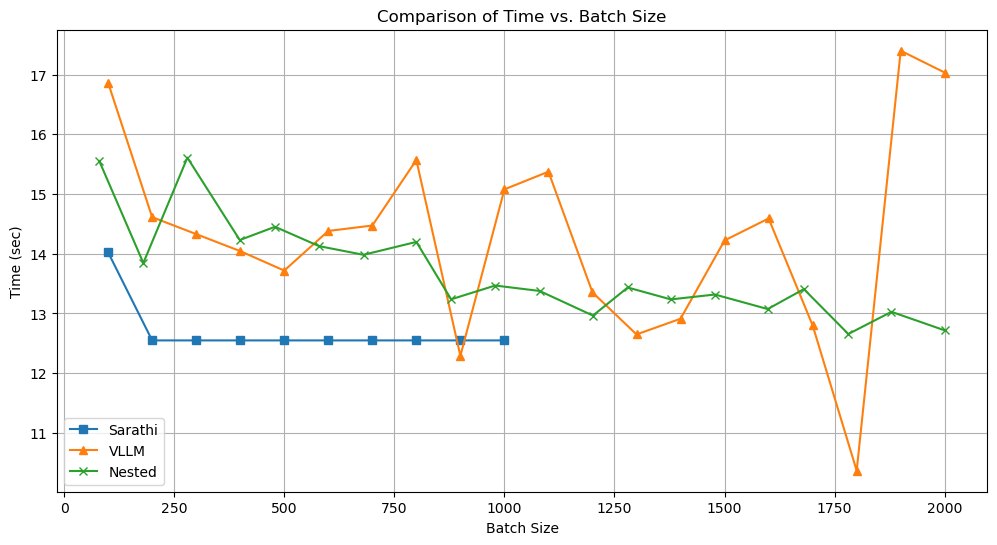

In [8]:
import matplotlib.pyplot as plt

# 确保每个DataFrame都有 'batch_size' 和 'time' 列
# modified_results 已经包含 batch_size 和 time 列
# sarahi_results 和 vllm_results 也包含 batch_size 和 time 列

# 绘制折线图
plt.figure(figsize=(12, 6))

# 绘制 modified_results 的折线图
#plt.plot(modified_results['batch_size'], modified_results['time'], marker='o', label='Modified')

# 绘制 sarahi_results 的折线图
plt.plot(sarathi_results['batch_size'], sarathi_results['time'], marker='s', label='Sarathi')

# 绘制 vllm_results 的折线图
plt.plot(vllm_results['batch_size'], vllm_results['time'], marker='^', label='VLLM')

# 绘制 nested_results 的折线图
plt.plot(nested_results['batch_size'], nested_results['time'], marker='x', label='Nested')

# 添加图例
plt.legend()

# 添加标题和轴标签
plt.title('Comparison of Time vs. Batch Size')
plt.xlabel('Batch Size')
plt.ylabel('Time (sec)')

# 添加网格
plt.grid(True)

# 显示图表
plt.show()

In [9]:
import pandas as pd
import os
import re
import matplotlib.pyplot as plt

def plot_1(start, end):
    # 指定文件夹路径
    nested_folder = './nested'
    vllm_folder = './vllm'
    sarathi_folder = './sarathi'

    # 1. 处理 nested 文件夹
    # 获取 nested 文件夹下所有符合条件的 CSV 文件
    nested_request_files = [f for f in os.listdir(nested_folder) 
                           if f.startswith('request_completion_time_series_general_nested_booking_limit_limit_') and f.endswith('.csv')]
    nested_throughput_files = [f for f in os.listdir(nested_folder) 
                              if f.startswith('throughput_general_nested_booking_limit_limit_') and f.endswith('.csv')]
    
    # 创建一个字典来存储每个 limit 对应的 batch_size
    limit_to_batch_size = {}
    for file in nested_throughput_files:
        match = re.search(r'limit_(\d+)_batch_size_(\d+)', file)
        if match:
            limit = int(match.group(1))
            batch_size = int(match.group(2))
            limit_to_batch_size[limit] = batch_size
            #print(f"limit: {limit}, batch_size: {batch_size}")
    
    # 检索出所有 nested request_completion 文件的行数
    nested_row_counts = [len(pd.read_csv(os.path.join(nested_folder, file))) for file in nested_request_files]
    if not nested_row_counts:
        raise ValueError("没有找到 nested 文件夹中的请求完成文件")
    min_row_count_nested = min(nested_row_counts)
    print(f"nested 文件夹中所有请求完成文件的公共最小行数目是: {min_row_count_nested}")

    # 确保 end 不超过 min_row_count_nested
    end = min(end, min_row_count_nested)

    # 2. 处理 nested 文件夹中的 request_completion 文件
    nested_results = pd.DataFrame(columns=['limit', 'batch_size', 'time'])
    for file in nested_request_files:
        file_path = os.path.join(nested_folder, file)
        df = pd.read_csv(file_path)
        # 仅保留从 start 到 end 的行数据
        df = df.iloc[start:end]  # 注意：end 是不包含的
        
        match = re.search(r'limit_(\d+)', file)
        if match:
            limit = int(match.group(1))
            batch_size = limit_to_batch_size.get(limit, None)
            last_time = df['Time (sec)'].iloc[-1] - df['Time (sec)'].iloc[0]
            new_row = pd.DataFrame({'limit': [limit], 'batch_size': [batch_size], 'time': [last_time]})
            nested_results = pd.concat([nested_results, new_row], ignore_index=True)
    nested_results = nested_results.sort_values(by='limit').reset_index(drop=True)

    # 3. 处理 vllm 和 sarathi 文件夹
    def process_folder(folder_path, prefix):
        csv_files = [f for f in os.listdir(folder_path) 
                     if f.startswith(prefix) and f.endswith('.csv')]
        results = pd.DataFrame(columns=['batch_size', 'time'])
        for file in csv_files:
            file_path = os.path.join(folder_path, file)
            df = pd.read_csv(file_path)
            df = df.iloc[start:end]
            match = re.search(r'batch_size_(\d+)', file)
            if match:
                batch_size = int(match.group(1))
                last_time = df['Time (sec)'].iloc[-1] - df['Time (sec)'].iloc[0]
                new_row = pd.DataFrame({'batch_size': [batch_size], 'time': [last_time]})
                results = pd.concat([results, new_row], ignore_index=True)
        results = results.sort_values(by='batch_size').reset_index(drop=True)
        return results

    vllm_results = process_folder(vllm_folder, 'request_completion_time_series')
    sarathi_results = process_folder(sarathi_folder, 'request_completion_time_series')

    # 4. 绘制折线图
    plt.figure(figsize=(12, 6))
    plt.plot(nested_results['batch_size'], nested_results['time'], marker='x', label='Nested')
    plt.plot(vllm_results['batch_size'], vllm_results['time'], marker='^', label='VLLM')
    plt.plot(sarathi_results['batch_size'], sarathi_results['time'], marker='s', label='Sarathi')

    plt.title(f'start={start}, end={end} Comparison of Time vs. Batch Size')
    plt.xlabel('Batch Size')
    plt.ylabel('Time (sec)')
    plt.legend()
    plt.grid(True)
    plt.show()

nested 文件夹中所有请求完成文件的公共最小行数目是: 5989


/var/folders/1m/8g05bgls5xbf421lv3q0dk_00000gn/T/ipykernel_41215/829932174.py:53: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  nested_results = pd.concat([nested_results, new_row], ignore_index=True)
/var/folders/1m/8g05bgls5xbf421lv3q0dk_00000gn/T/ipykernel_41215/829932174.py:70: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, new_row], ignore_index=True)
/var/folders/1m/8g05bgls5xbf421lv3q0dk_00000gn/T/ipykernel_41215/829932174.py:70: FutureWarning: The behavior of

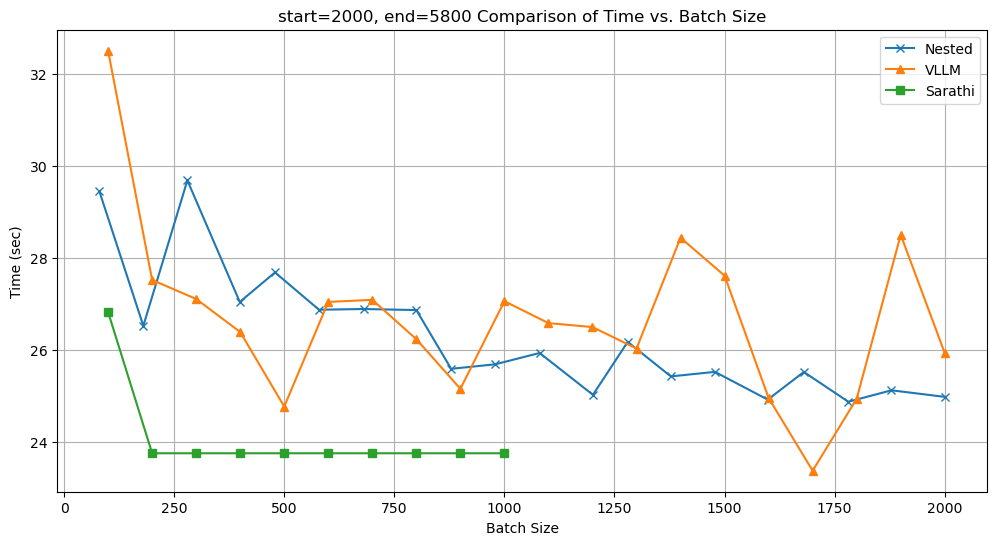

In [11]:
start = 2000  # 输入起始行
end = 5800    # 输入结束行
plot_1(start, end)